# Maximum, Minimum, Median, etc. Maps from Giovanni

***

## This feature would allow for our users who are interested in single maps from a time series of maps, but not 
## interested in plotting the mean, examples of such analyses are  such as:

### - Heat Waves
### - Cold Outbreaks

***

### This notebook requires the following python packages and their dependencies installed.

__Required:__
- numpy
- xarray
- matplotlib
- glob (for gathering list of .nc4 files)

___Used for Plotting:___
- cmaps (NCL colormaps)
- cartopy (for plotting maps, not necessary)
- pandas (for date range plotting)

#### Data Used in Example From GES DISC 

In this example we use 7 consecutive days of [Maximum 2-m Temperature data from MERRA-2](https://disc.gsfc.nasa.gov/datasets/M2SDNXSLV_5.12.4/summary?keywords=statD_2d_slv) from the May 2025 Heatwave to illustrate the use of a Maximum Map Feature.
***


In [1]:
#Importing Packages
import glob
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cmaps
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

##### Opening the data in Xarray.

In [2]:
#Gather Files into a list using glob
files = glob.glob("C:/Users/bomitch1/Downloads/Giovanni_Stats_Examples/2/MERRA2_*")

#Open all the separate days into one dataset and then calling the Temperature variable for HeatWave 2025
hw_2025 = xr.open_mfdataset(files)['T2MMAX']

print(hw_2025)

<xarray.DataArray 'T2MMAX' (time: 7, lat: 57, lon: 98)> Size: 156kB
dask.array<concatenate, shape=(7, 57, 98), dtype=float32, chunksize=(1, 57, 98), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 456B 23.5 24.0 24.5 25.0 25.5 ... 50.0 50.5 51.0 51.5
  * lon      (lon) float64 784B -128.1 -127.5 -126.9 ... -68.75 -68.12 -67.5
  * time     (time) datetime64[ns] 56B 2025-05-10T12:00:00 ... 2025-05-16T12:...
Attributes:
    long_name:       2-meter_air_temperature
    units:           K
    fmissing_value:  1000000000000000.0
    standard_name:   2-meter_air_temperature
    cell_methods:    time: maximum
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]
    origname:        T2MMAX
    fullnamepath:    /T2MMAX


##### Compute the Maximum Temperature over each grid cell for the 7-day Period

In [3]:
#Compute the Maximum through the time dimension
max_hw_2025 = hw_2025.max(dim='time')

#Compute the Median through the time dimension
med_hw_2025 = hw_2025.median(dim='time')

print(max_hw_2025)

<xarray.DataArray 'T2MMAX' (lat: 57, lon: 98)> Size: 22kB
dask.array<_nanmax_skip-aggregate, shape=(57, 98), dtype=float32, chunksize=(57, 98), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 456B 23.5 24.0 24.5 25.0 25.5 ... 50.0 50.5 51.0 51.5
  * lon      (lon) float64 784B -128.1 -127.5 -126.9 ... -68.75 -68.12 -67.5


##### Function for Map Subplots

In [4]:
def subplot_map(da,title,rows,cols,plot_num):
    ax1 = plt.subplot(rows,cols,plot_num+1)

    #Set Map Extent
    ax1.set_extent([-127, -64, 20, 50])

    #Add Map Features
    ax1.coastlines(resolution='10m')
    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.OCEAN)
    ax1.add_feature(cfeature.LAKES)
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(cfeature.STATES, edgecolor='black')
    ax1.grid(linestyle='dotted')

    #Create and Format Ticks
    ax1.set_yticks(np.arange(20,51,5), crs=ccrs.PlateCarree())
    ax1.set_xticks(np.arange(-125,-65,20), crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

    #Plot the values inside the map
    grid = da.plot.imshow(ax=ax1,cmap=cmaps.WhiteBlueGreenYellowRed,add_colorbar=False,vmin=275,vmax=315)
    
    #Add the Plot Title and X and Y axis labels along with font sizes
    ax1.set_title(title, size=12, fontweight='bold')
    ax1.set_xlabel("Longitude",  size=10)
    ax1.set_ylabel("Latitude", size=10)
    ax1.tick_params(axis='x', labelsize=10)  
    ax1.tick_params(axis='y', labelsize=10) 

    return(grid)

##### Plotting the Data (9-panel plot) Showing all the Maps and an example of Maximum and Median Maps

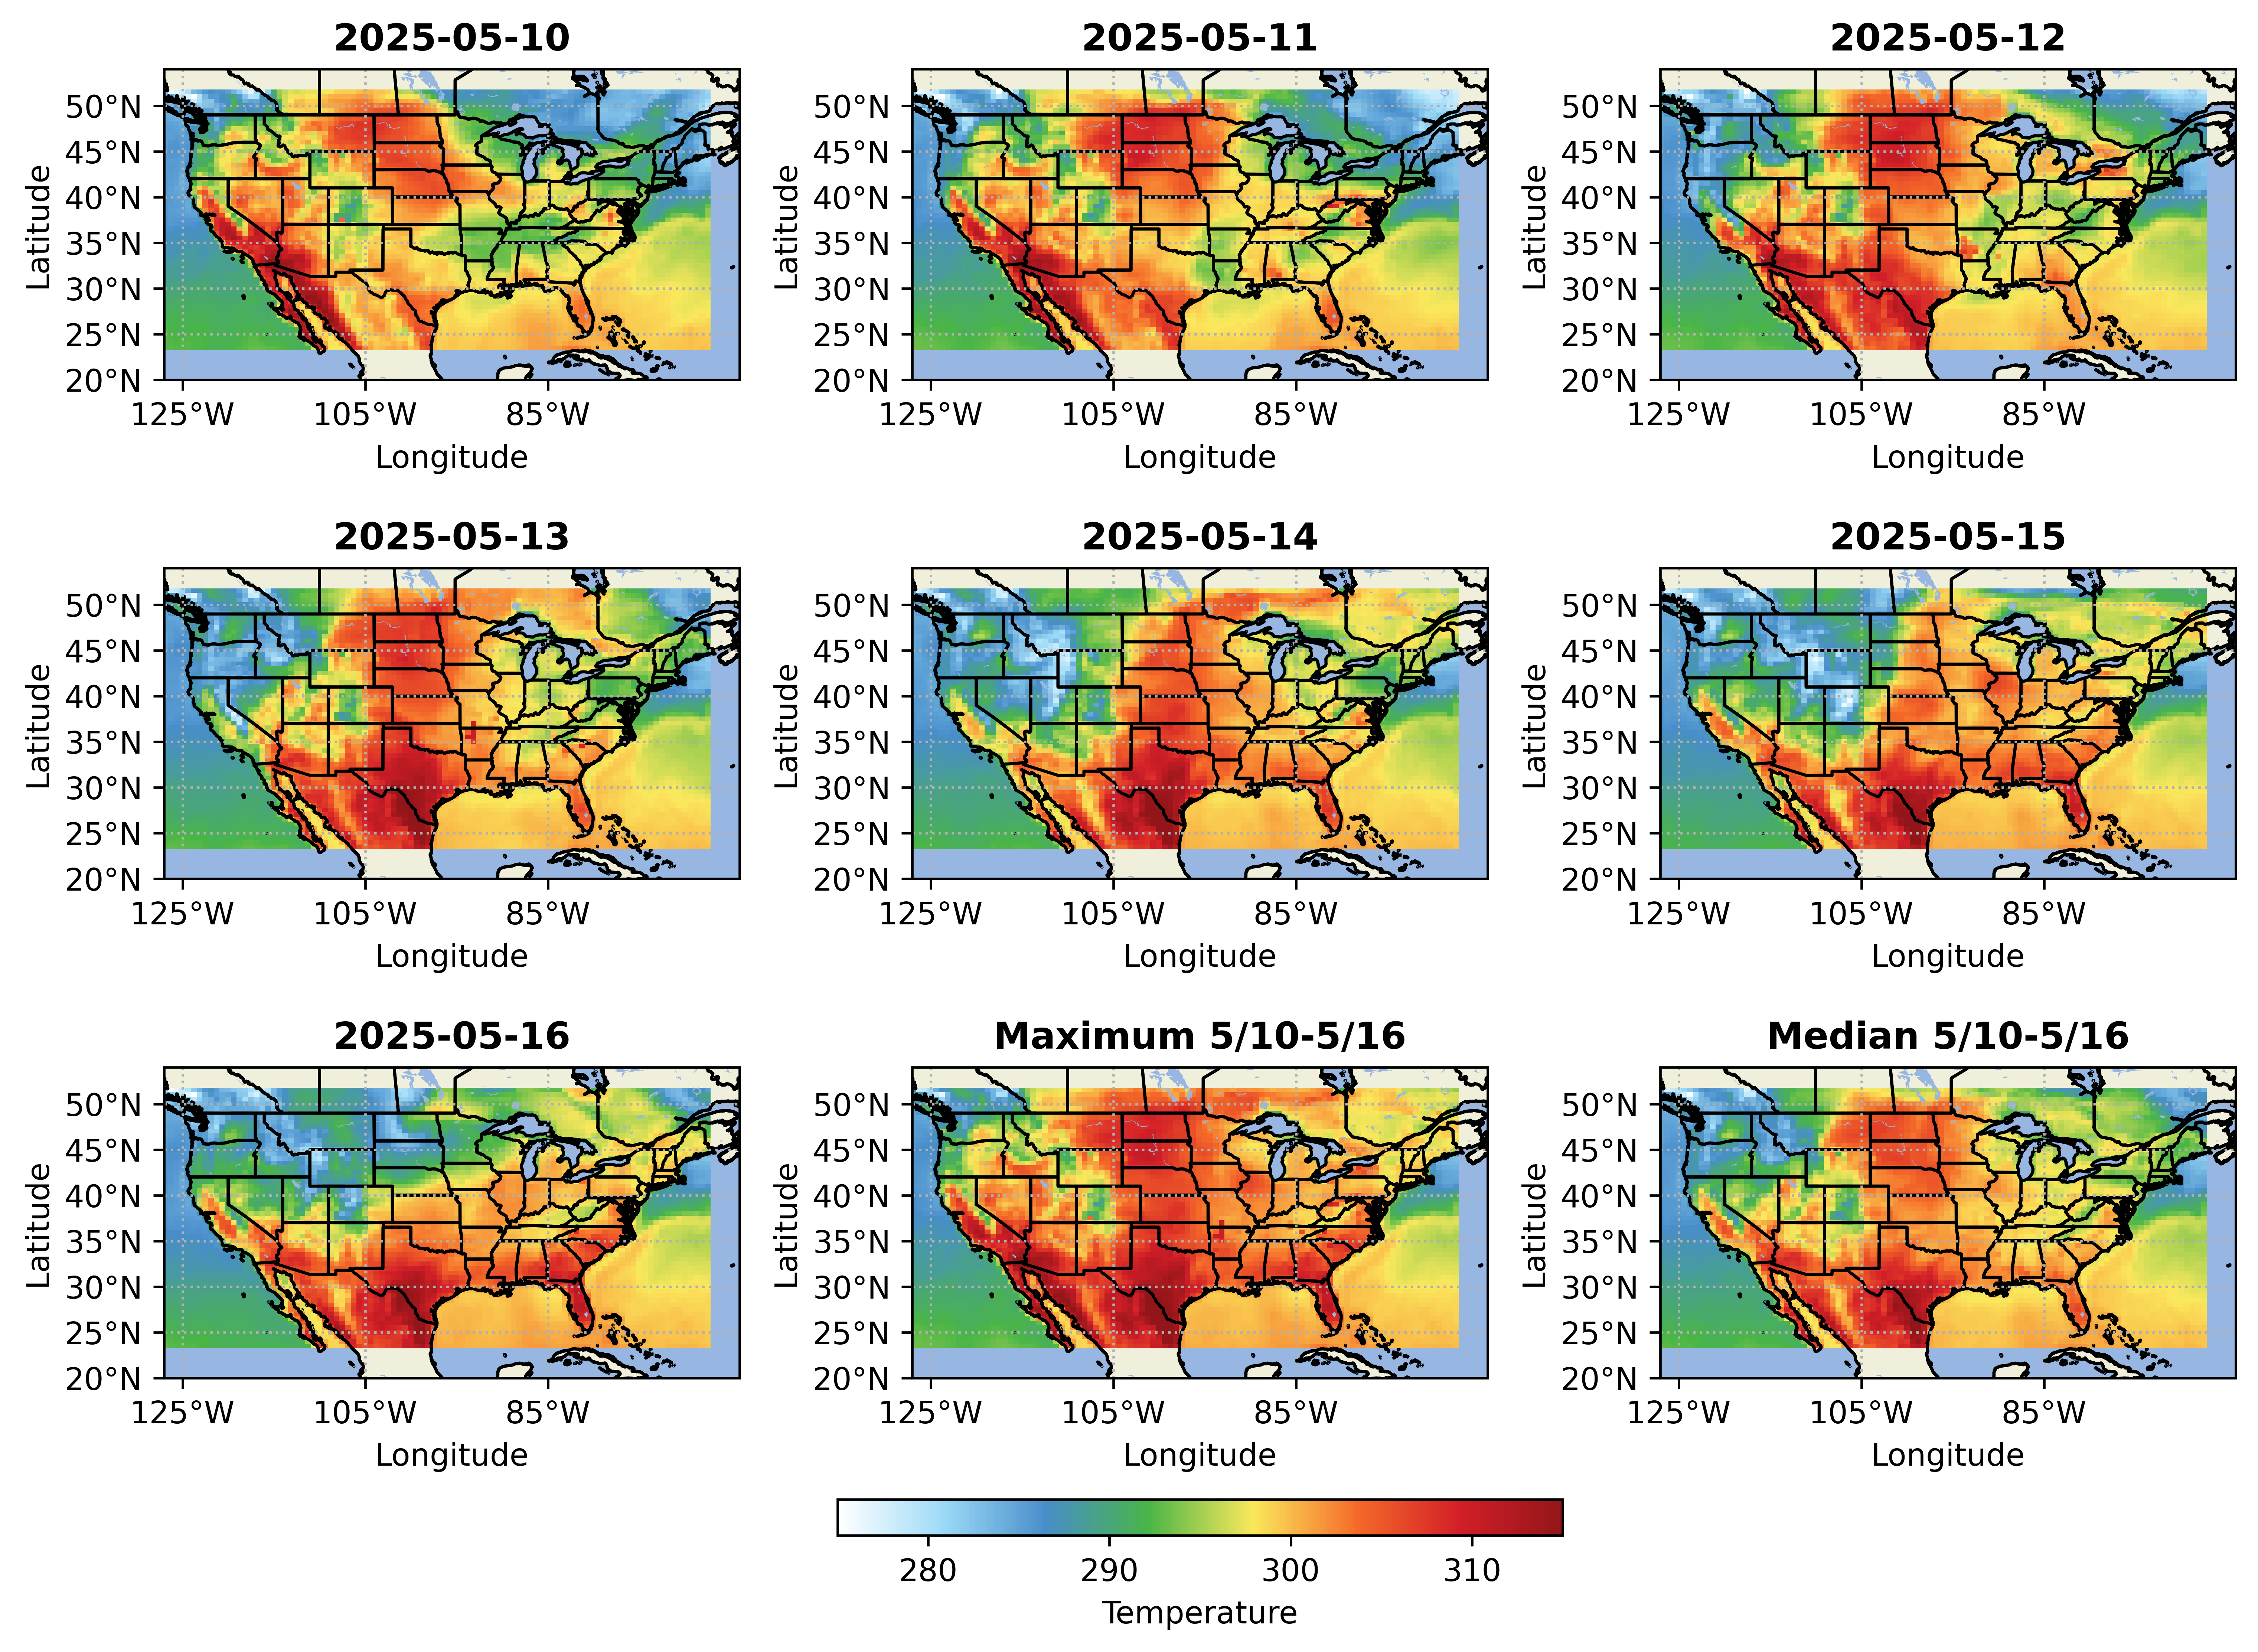

In [5]:
#Generate Figure and Draw Axes using Cartopy Plate Carree Projection
fig, axs = plt.subplots(3,3,figsize=(12,10),subplot_kw={"projection": ccrs.PlateCarree()},
                          dpi=600)

#List of Dates for Subplot Titles
date_range_periods = pd.date_range(start='2025-05-10', periods=7)

#Looping through the Maps from hw2025 and plotting each map. 
for x in range(0,len(hw_2025)):
    grid = subplot_map(hw_2025[x],date_range_periods[x].date(),3,3,x)

#Plotting Maximum Map
subplot_map(max_hw_2025,"Maximum 5/10-5/16",3,3,x+1) #Add +1 So we don't overwrite any previous subplots

#Plotting Median Map
subplot_map(med_hw_2025,"Median 5/10-5/16",3,3,x+2) #Add +2 So we don't overwrite a previous subplot

#Have One Colorbar Span Bottom of Panel
cbar = fig.colorbar(grid,orientation='horizontal',ax=axs[:,:], label='Temperature',shrink=0.35)

#Adjust Subplot Spacing Manually because we are adding a colorbar at the bottom 
plt.subplots_adjust(wspace=0.3,top=0.95,bottom=0.28,hspace=0.01)